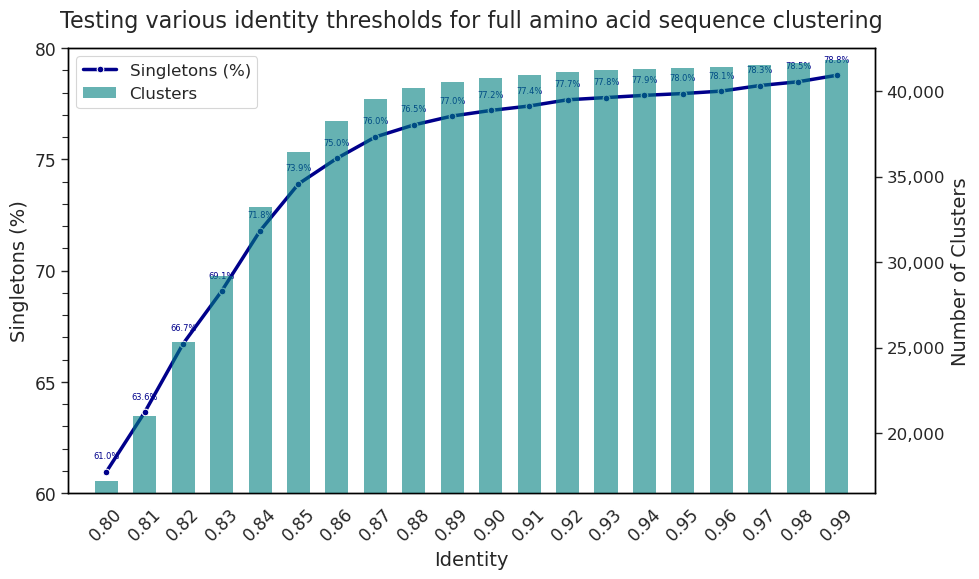

✅ Clean plot saved to: /mnt/lustre/RDS-live/moon/ephemeral/test/methane/scRNAseq_vdj/pilot_2024/outputs/cellranger_vdj/all_samples/2_Clustering/testing_ids/slurm_outs/testing_various_identity_dualaxis_clean.pdf


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter
from pathlib import Path
import os

# === CONFIG ===
output_dir = "/mnt/lustre/RDS-live/moon/ephemeral/test/methane/scRNAseq_vdj/pilot_2024/outputs/cellranger_vdj/all_samples/2_Clustering/testing_ids/slurm_outs/"
csv_file = os.path.join(output_dir, "fullAA_clustered_outputs_summary.csv")
pdf_file = os.path.join(output_dir, "testing_various_identity_dualaxis_clean.pdf")

# Ensure output directory exists
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Load and validate data
df = pd.read_csv(csv_file)
assert {'identity', 'singletons_percentage', 'clusters'}.issubset(df.columns)
df = df.sort_values('identity')

# Seaborn/Matplotlib aesthetics
sns.set(style="white", context="paper", font_scale=1.4)
plt.rcParams['axes.grid'] = False  # Disable auto grid
plt.rcParams['axes.edgecolor'] = 'black'

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis: Singleton line
sns.lineplot(
    data=df,
    x='identity',
    y='singletons_percentage',
    marker='o',
    linewidth=2.5,
    color='darkblue',
    ax=ax1,
    label="Singletons (%)"
)

# Add text labels above each point on the singleton line
for x, y in zip(df['identity'], df['singletons_percentage']):
    ax1.text(x, y + 0.5, f"{y:.1f}%", ha='center', va='bottom', fontsize=6, color='darkblue')

# Left y-axis config
ax1.set_ylabel("Singletons (%)", fontsize=14)
ax1.set_ylim(60, 80)
ax1.set_yticks(np.arange(60, 81, 5))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.tick_params(axis='y', which='minor', length=4)
ax1.minorticks_on()

# X-axis config
x_min, x_max = df['identity'].min(), df['identity'].max()
ax1.set_xlim(x_min - 0.01, x_max + 0.01)
ax1.set_xticks(np.arange(round(x_min, 2), x_max + 0.01, 0.01))
ax1.set_xlabel("Identity", fontsize=14)
ax1.tick_params(axis='x', rotation=45)

# Disable all grids
ax1.grid(False)

# Right y-axis: Cluster bars
ax2 = ax1.twinx()
bars = ax2.bar(
    df['identity'],
    df['clusters'],
    width=0.006,
    color='teal',
    alpha=0.6,
    edgecolor='none',  # No border
    linewidth=0
)

ax2.set_ylabel("Number of Clusters", fontsize=14)
ax2.set_ylim(16500, 42500)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(False)

# Final plot touches
plt.title("Testing various identity thresholds for full amino acid sequence clustering", fontsize=16, pad=15)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = [bars], ["Clusters"]
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# Save and show
plt.tight_layout()
plt.savefig(pdf_file, dpi=600, format='pdf', transparent=True, bbox_inches='tight')
plt.show()

print(f"✅ Clean plot saved to: {pdf_file}")